In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Formula

In [2]:
column_A = [1, 2, 3, 4, 5]
column_B = [5, 4, 6, 7, 8]


In [3]:
from openpyxl import Workbook
wb = Workbook()
ws = wb.active

In [4]:
for idx, (a, b) in enumerate(zip(column_A, column_B), 1):
    ws[f"A{idx}"] = a
    ws[f"B{idx}"] = b
    ws[f"C{idx}"] = f"=SUM(A{idx}:B{idx})"

# Surface chart

In [5]:
from openpyxl import Workbook
from openpyxl.chart import (
    SurfaceChart,
    SurfaceChart3D,
    Reference,
)

ws = wb.create_sheet("Surface Chart")

data = [
    [None, 10, 20, 30, 40, 50,],
    [0.1, 15, 65, 105, 65, 15,],
    [0.2, 35, 105, 170, 105, 35,],
    [0.3, 55, 135, 215, 135, 55,],
    [0.4, 75, 155, 240, 155, 75,],
    [0.5, 80, 190, 245, 190, 80,],
    [0.6, 75, 155, 240, 155, 75,],
    [0.7, 55, 135, 215, 135, 55,],
    [0.8, 35, 105, 170, 105, 35,],
    [0.9, 15, 65, 105, 65, 15],
]

for row in data:
    ws.append(row)


c1 = SurfaceChart()
ref = Reference(ws, min_col=2, max_col=6, min_row=1, max_row=10)
labels = Reference(ws, min_col=1, min_row=2, max_row=10)
c1.add_data(ref, titles_from_data=True)
c1.set_categories(labels)
c1.title = "Contour"

ws.add_chart(c1, "A12")

from copy import deepcopy

# wireframe
c2 = deepcopy(c1)
c2.wireframe = True
c2.title = "2D Wireframe"

ws.add_chart(c2, "G12")

# 3D Surface
c3 = SurfaceChart3D()
c3.add_data(ref, titles_from_data=True)
c3.set_categories(labels)
c3.title = "Surface"

ws.add_chart(c3, "A29")

c4 = deepcopy(c3)
c4.wireframe = True
c4.title = "3D Wireframe"

ws.add_chart(c4, "G29")

# 3D Area Chart

In [6]:
from openpyxl import Workbook
from openpyxl.chart import (
    AreaChart3D,
    Reference,
)

ws = wb.create_sheet("3D area chart")

rows = [
    ['Number', 'Batch 1', 'Batch 2'],
    [2, 30, 40],
    [3, 25, 40],
    [4 ,30, 50],
    [5 ,10, 30],
    [6,  5, 25],
    [7 ,10, 50],
]

for row in rows:
    ws.append(row)

chart = AreaChart3D()
chart.title = "Area Chart"
chart.style = 13
chart.x_axis.title = 'Test'
chart.y_axis.title = 'Percentage'
chart.legend = None

cats = Reference(ws, min_col=1, min_row=1, max_row=7)
data = Reference(ws, min_col=2, min_row=1, max_col=3, max_row=7)
chart.add_data(data, titles_from_data=True)
chart.set_categories(cats)

ws.add_chart(chart, "A10")

In [7]:
from openpyxl import Workbook
from openpyxl.styles import Font, PatternFill, Alignment

# Create a new workbook and select active worksheet
ws = wb.create_sheet("Style")

# Write some text in A1
cell = ws["A1"]
cell.value = "Styled Text"

# Apply font styles
cell.font = Font(name="Calibri", bold=True, italic=True, size=14, color="FFFFFF")

# Apply background color
cell.fill = PatternFill(start_color="4F81BD", end_color="4F81BD", fill_type="solid")

# Center align the text
cell.alignment = Alignment(horizontal="center", vertical="center")

# Merge cells from A1 to C1
ws.merge_cells("A1:C1")

# Add another styled cell
cell2 = ws["A2"]
cell2.value = "Another Example"
cell2.font = Font(color="FF0000", underline="single")


In [8]:
wb.save("sample.xlsx")

In [ ]:
[
    1,
    14,
    12,
    3,
    10,
    19,
    8,
    15,
    14,
    0,
    4,
    14,
    0,
    13,
    8,
    11,
    1,
    9,
    10,
    17,
    9,
    8,
    7,
    5,
    3,
    19,
    4,
    19,
    17,
    10,
    12,
    5,
    8,
    14,
    0,
    19,
    19,
    19,
    2,
    11,
    7,
    17,
    2,
    3,
    17,
    6,
    4,
    5,
    6,
    14,
]

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_30991/2998509888.py:10: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, np.sin(x), label='$\sin(x)$')


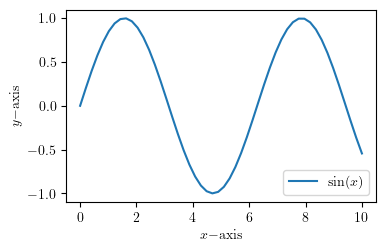

In [9]:
from matplotlib import pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=10.0)
plt.rc('legend', fontsize=10.0)
plt.rc('font', weight='normal')
x = np.linspace(0, 10)
plt.figure(figsize=(4, 2.5))
plt.plot(x, np.sin(x), label='$\sin(x)$')
plt.xlabel(r'$x\mathrm{-axis}$')
plt.ylabel(r'$y\mathrm{-axis}$')
plt.legend(loc='lower right')
plt.savefig('myplot.pdf', bbox_inches='tight')

In [10]:
from datetime import date

from openpyxl import Workbook
from openpyxl.chart import (
    LineChart,
    Reference,
)
from openpyxl.chart.axis import DateAxis

wb = Workbook()
ws = wb.active

values = np.sin(np.linspace(0, 10))+2

for value in values:
    ws.append([value])

c1 = LineChart()

data = Reference(ws, min_col=1, min_row=1, max_col=1, max_row=len(values))
c1.add_data(data)


ws.add_chart(c1, "C2")

wb.save("line3D.xlsx")